In [6]:
import numpy as np                                         
import pandas as pd 
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

import seaborn as sns                                       
import matplotlib.pyplot as plt                                         
from sklearn.model_selection import train_test_split   

from sklearn import preprocessing                      
from scipy.stats import zscore                     
from sklearn.linear_model import LinearRegression      
from sklearn.linear_model import Ridge                        
from sklearn.linear_model import Lasso   
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics                                             
from sklearn.metrics import mean_squared_error        
from sklearn.metrics import mean_absolute_error       
from sklearn.metrics import mean_squared_log_error  


# Read the data as a data frame
df = pd.read_csv("Downloads/archive (13).zip")    


FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/archive (13).zip'

In [ ]:
df.head()

In [3]:
df.tail()

,Date,Close/Last,Volume,Open,High,Low
2542,11/06/2012,1715.0,163585.0,1685.4,1720.9,1683.5
2543,11/05/2012,1683.2,109647.0,1676.7,1686.2,1672.5
2544,11/02/2012,1675.2,205777.0,1715.6,1717.2,1674.8
2545,11/01/2012,1715.5,105904.0,1720.4,1727.5,1715.1
2546,10/31/2012,1719.1,110928.0,1710.3,1726.6,1709.8


In [4]:
df.info


<bound method DataFrame.info of             Date  Close/Last    Volume    Open    High     Low
0     10/28/2022      1648.3  186519.0  1667.2  1670.9  1640.7
1     10/27/2022      1668.8  180599.0  1668.8  1674.8  1658.5
2     10/26/2022      1669.2  183453.0  1657.7  1679.4  1653.8
3     10/25/2022      1658.0  178706.0  1654.5  1666.8  1641.2
4     10/24/2022      1654.1  167448.0  1662.9  1675.5  1648.0
...          ...         ...       ...     ...     ...     ...
2542  11/06/2012      1715.0  163585.0  1685.4  1720.9  1683.5
2543  11/05/2012      1683.2  109647.0  1676.7  1686.2  1672.5
2544  11/02/2012      1675.2  205777.0  1715.6  1717.2  1674.8
2545  11/01/2012      1715.5  105904.0  1720.4  1727.5  1715.1
2546  10/31/2012      1719.1  110928.0  1710.3  1726.6  1709.8

[2547 rows x 6 columns]>

In [6]:
df.isnull().sum()

Date           0
Close/Last     0
Volume        39
Open           0
High           0
Low            0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['Volume'].fillna(df['Volume'].mean(), inplace=True)

In [9]:
df.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [10]:
df=df.rename(columns={'Close/Last':'Close'})

FINDING COREELATION COEFFICIENT:

In [11]:
sns.set(style='whitegrid', context='notebook')
cols=['Close','Volume','Open','High','Low']

In [12]:
cm = np.corrcoef(df[cols].values.T)
cm

array([[1.        , 0.06361153, 0.99870273, 0.99933358, 0.99941966],
       [0.06361153, 1.        , 0.06857301, 0.07255755, 0.05867706],
       [0.99870273, 0.06857301, 1.        , 0.99927226, 0.99914213],
       [0.99933358, 0.07255755, 0.99927226, 1.        , 0.99889456],
       [0.99941966, 0.05867706, 0.99914213, 0.99889456, 1.        ]])

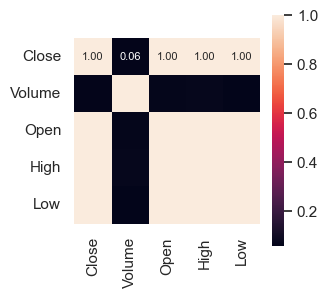

In [86]:
plt.figure(figsize=(3,3))

sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':8},
               
                xticklabels=cols,
                yticklabels=cols)
plt.savefig("Downloads/correlation.png")
plt.show()

USING STRONG COREELATION:
CLOSE,OPEN,HIGH,LOW

FINDING OUTLIERS IN CLOSE,LOW,HIGH,OPEN ATTRIBUTES:

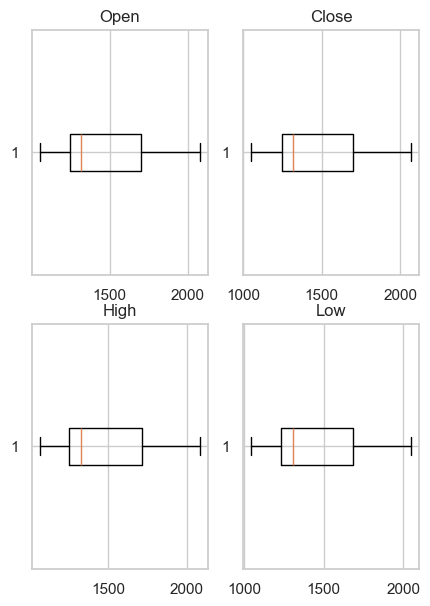

In [85]:
fig, axs = plt.subplots(2,2,figsize=(5,7))

axs[0, 0].boxplot(df['Open'], vert=False)
axs[0, 0].set_title('Open')

axs[0, 1].boxplot(df['Close'], vert=False)
axs[0, 1].set_title('Close')

axs[1, 0].boxplot(df['High'], vert=False)
axs[1, 0].set_title('High')

axs[1, 1].boxplot(df['Low'], vert=False)
axs[1, 1].set_title('Low')
plt.savefig("Downloads/outliers.png")

# show the plot
plt.show()


DATA SCALING:

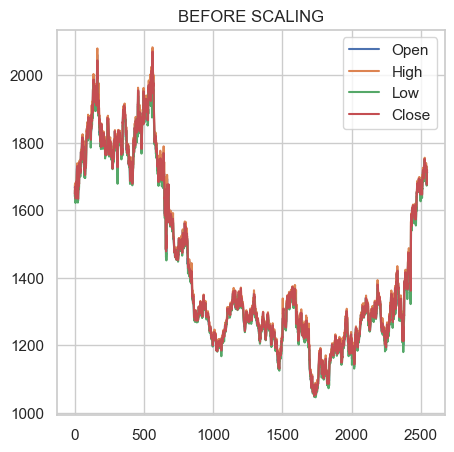

In [84]:
plt.figure(figsize=(5,5))
plt.plot(df['Open'], label='Open')
plt.plot(df['High'], label='High')
plt.plot(df['Low'], label='Low')
plt.plot(df['Close'], label='Close')
plt.title('BEFORE SCALING')
plt.legend()
plt.savefig("Downloads/beforescaling.png")
plt.show()


In [20]:
cname = df[['Open', 'Close', 'Low', 'High']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cname)
sc = pd.DataFrame(scaled_data, columns=cname.columns)


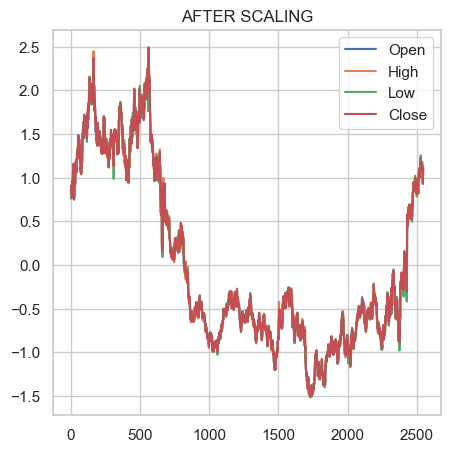

In [83]:
plt.figure(figsize=(5, 5))
plt.plot(sc['Open'], label='Open')
plt.plot(sc['High'], label='High')
plt.plot(sc['Low'], label='Low')
plt.plot(sc['Close'], label='Close')
plt.title('AFTER SCALING')

plt.legend()
plt.savefig("Downloads/aferscaling.png")
plt.show()


MODEL CREATION AND TRAING:

In [34]:
x=sc.drop(['Close'],axis=1)
y=sc['Close']

In [35]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=2)

In [36]:
regressor= RandomForestRegressor(n_estimators=100)


In [37]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
test_data_prediction=regressor.predict(x_test)

In [56]:
R2=metrics.r2_score(y_test,test_data_prediction)
print("R squarederror:",R2)
MSE=metrics.mean_squared_error(y_test,test_data_prediction)
print("mean squarederror:",MSE)
MAE=metrics.mean_absolute_error(y_test,test_data_prediction)
print("maen absolute error:",MAE)
MBE=metrics.mean_squared_error(y_test,test_data_prediction,squared=False)
print("mean bias error:",MBE)
RMSE= np.sqrt(MSE)
print("Root Mean Squared Error (RMSE):",RMSE)


R squarederror: 0.999293903124131
mean squarederror: 0.0006738533598484328
maen absolute error: 0.018083982654367607
mean bias error: 0.02595868563406924
Root Mean Squared Error (RMSE): 0.02595868563406924


In [40]:
y_test=list(y_test)

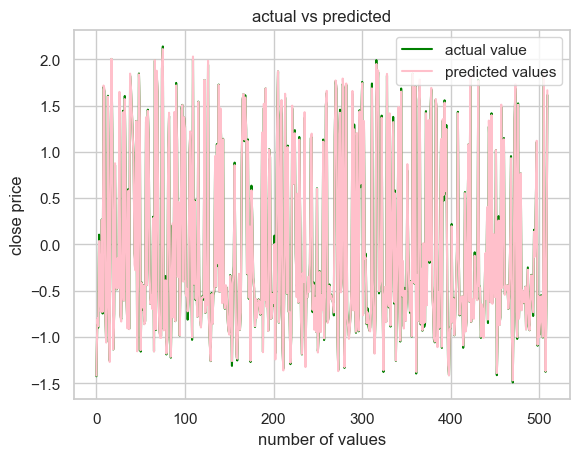

In [82]:
plt.plot(y_test,color='green',label='actual value')
plt.plot(test_data_prediction,color='pink',label='predicted values')
plt.title("actual vs predicted")
plt.xlabel("number of values")
plt.ylabel("close price")
plt.legend()
plt.savefig("Downloads/random.png")
plt.show()

In [42]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
test_data_prediction2=lr.predict(x_test)

In [57]:
R2=metrics.r2_score(y_test,test_data_prediction2)
print("R squarederror:",R2)
MSE=metrics.mean_squared_error(y_test,test_data_prediction2)
print("mean squarederror:",MSE)
MAE=metrics.mean_absolute_error(y_test,test_data_prediction2)
print("maen absolute error:",MAE)
MBE=metrics.mean_squared_error(y_test,test_data_prediction2,squared=False)
print("mean bias error:",MBE)
RMSE= np.sqrt(MSE)
print("Root Mean Squared Error (RMSE):",RMSE)


R squarederror: 0.9994329411193418
mean squarederror: 0.0005411644563547884
maen absolute error: 0.01621850393490447
mean bias error: 0.02326294169607078
Root Mean Squared Error (RMSE): 0.02326294169607078


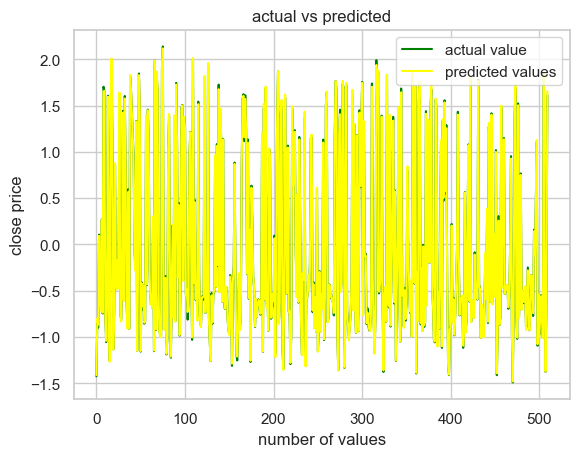

In [81]:
plt.plot(y_test,color='green',label='actual value')
plt.plot(test_data_prediction2,color='yellow',label='predicted values')
plt.title("actual vs predicted")
plt.xlabel("number of values")
plt.ylabel("close price")
plt.legend()
plt.savefig("Downloads/linear.png")
plt.show()

In [46]:
rid=Ridge(alpha=3)
rid.fit(x_train,y_train)

Ridge(alpha=3)

In [47]:
test_data_prediction3=rid.predict(x_test)

In [58]:
R2=metrics.r2_score(y_test,test_data_prediction3)
print("R squarederror:",R2)
MSE=metrics.mean_squared_error(y_test,test_data_prediction3)
print("mean squarederror:",MSE)
MAE=metrics.mean_absolute_error(y_test,test_data_prediction3)
print("maen absolute error:",MAE)
MBE=metrics.mean_squared_error(y_test,test_data_prediction3,squared=False)
print("mean bias error:",MBE)
RMSE= np.sqrt(MSE)
print("Root Mean Squared Error (RMSE):",RMSE)


R squarederror: 0.9992624833281671
mean squarederror: 0.0007038383885316321
maen absolute error: 0.019174125951856268
mean bias error: 0.026529952667346247
Root Mean Squared Error (RMSE): 0.026529952667346247


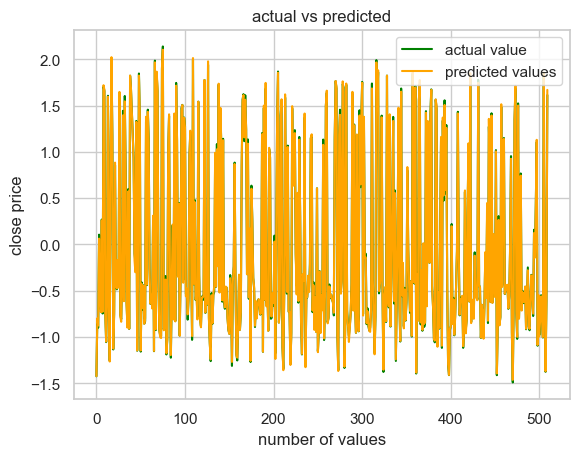

In [80]:
plt.plot(y_test,color='green',label='actual value')
plt.plot(test_data_prediction3,color='orange',label='predicted values')
plt.title("actual vs predicted")
plt.xlabel("number of values")
plt.ylabel("close price")
plt.savefig("Downloads/ridge.png")
plt.legend()
plt.show()

In [50]:
las=Lasso(alpha=0.1)
las.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.882e-01, tolerance: 2.058e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [51]:
test_data_prediction4=las.predict(x_test)

In [59]:
R2=metrics.r2_score(y_test,test_data_prediction4)
print("R squarederror:",R2)
MSE=metrics.mean_squared_error(y_test,test_data_prediction4)
print("mean squarederror:",MSE)
MAE=metrics.mean_absolute_error(y_test,test_data_prediction4)
print("maen absolute error:",MAE)
MBE=metrics.mean_squared_error(y_test,test_data_prediction,squared=False)
print("mean bias error:",MBE)
RMSE= np.sqrt(MSE)
print("Root Mean Squared Error (RMSE):",RMSE)



R squarederror: 0.9895830108831865
mean squarederror: 0.00994130317774143
maen absolute error: 0.08820331148838931
mean bias error: 0.02595868563406924
Root Mean Squared Error (RMSE): 0.09970608395550108


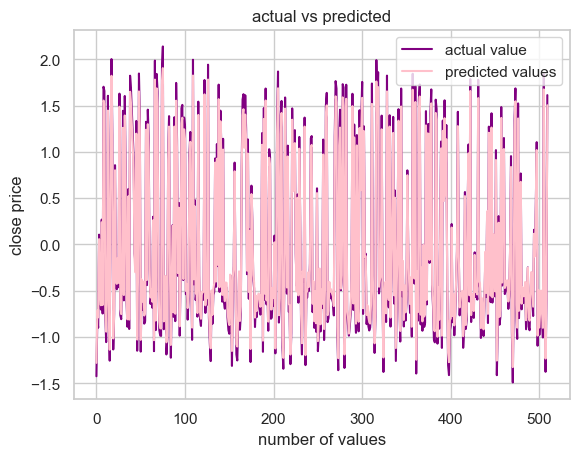

In [79]:
plt.plot(y_test,color='purple',label='actual value')
plt.plot(test_data_prediction4,color='pink',label='predicted values')
plt.title("actual vs predicted")
plt.xlabel("number of values")
plt.ylabel("close price")
plt.legend()
plt.savefig("Downloads/lasso.png")
plt.show()

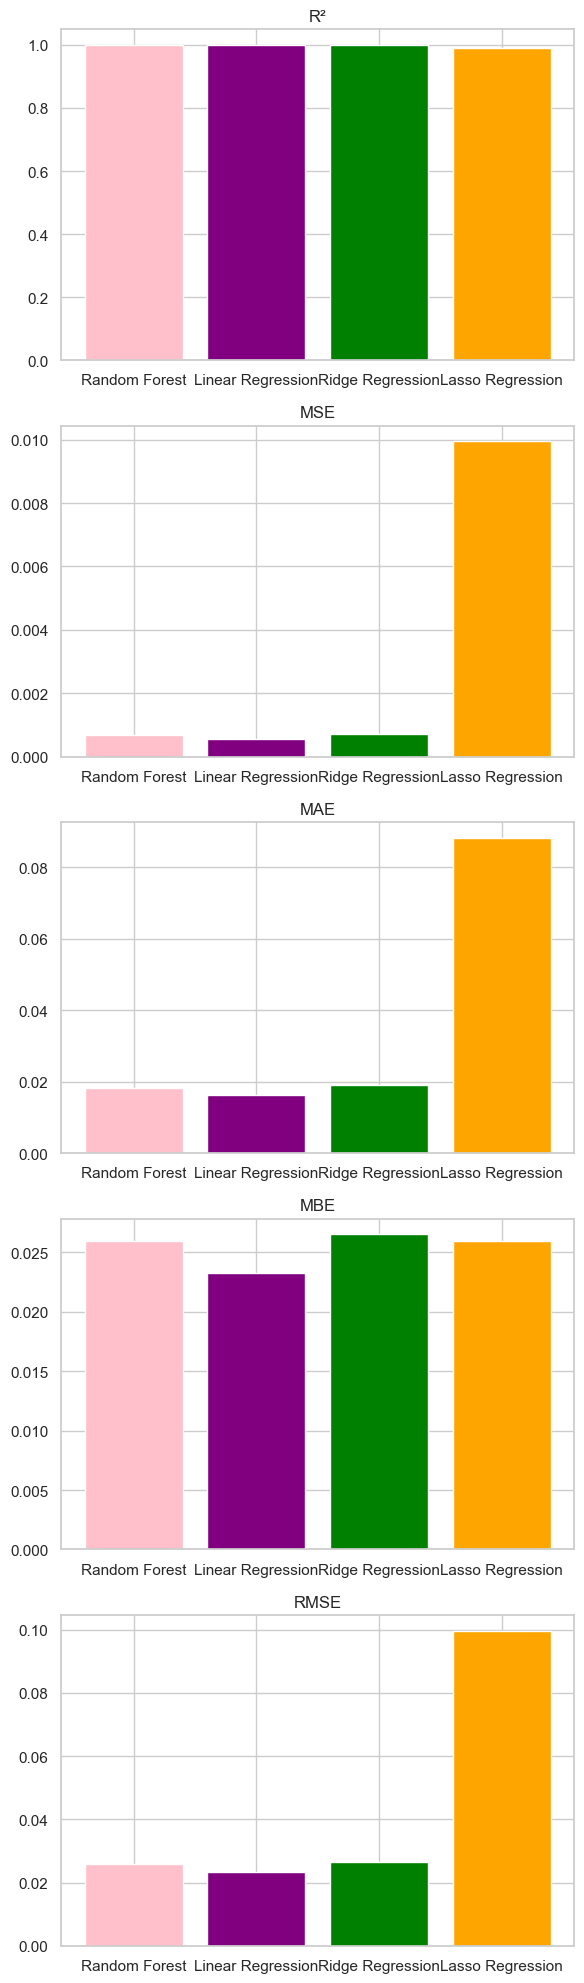

In [78]:
metrics = ['R²', 'MSE', 'MAE', 'MBE', 'RMSE']
random_forest = [0.999293903124131, 0.0006738533598484328, 0.018083982654367607, 0.02595868563406924, 0.02595868563406924]
linear_regression = [0.9994329411193418, 0.0005411644563547884, 0.01621850393490447, 0.02326294169607078, 0.02326294169607078]
ridge_regression = [0.9992624833281671, 0.0007038383885316321, 0.019174125951856268, 0.026529952667346247, 0.026529952667346247]
lasso_regression = [0.9895830108831865, 0.00994130317774143, 0.08820331148838931, 0.02595868563406924, 0.09970608395550108]

# Create subplots for each metric
fig, axs = plt.subplots(5 ,figsize=(6, 20))
colors = ['pink', 'purple', 'green', 'orange']

for i, metric in enumerate(metrics):
    axs[i].bar(['Random Forest', 'Linear Regression', 'Ridge Regression', 'Lasso Regression'], 
               [random_forest[i], linear_regression[i], ridge_regression[i], lasso_regression[i]], 
               color=colors)
    axs[i].set_title(metric)

plt.tight_layout()
plt.savefig("Downloads/graph.png")
plt.show()
